In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$$LL(W)=\sum_{i=1}^{N}y_iw^Tx_i-\log(1+\exp(w^Tx_i))$$
Take derivative respect to w $$\frac{\partial LL(w)}{\partial w}$$,we can get the gradient is
$$\sum_{i=1}^{N}y_ix_i- \frac{e^{w^Tx_i}}{1+e^{w^Tx_i}}x_i$$

In [58]:
def sigmoid(scores):
    """
    return e^x/(1+e^x)
    """
    return 1 / (1 + np.exp(-scores))

In [59]:
def log_likelihood(features, target, weights):
    """
    This is LL(W) function to check how well the gradient descent be
    """
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [60]:
def logistic_regression(features, target, num_steps,learning_rate):
    """
    use logitstic regression to calculate weight and eventually use weigh we got 
    to predict test target using wx linear function.
    """    
    weights = np.zeros(features.shape[1])
    #learning_rate=1
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        #learning_rate=learning_rate/2
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

In [61]:
def roc_table(probability, target):
    """
    get roc table we you input probability and target we need to evaluate
    """
    df = pd.DataFrame({ 'True Class':target ,'probability':probability})
    df=df.sort_values('probability',ascending=False)
    threshold=df.probability.unique().tolist()
    tp=[]
    fp=[]
    tn=[]
    fn=[]
    for i in threshold:
        tp.append(np.in1d(df.loc[lambda df: df.probability >= i, :],1).sum())
        fp.append(np.in1d(df.loc[lambda df: df.probability >= i, :],0).sum())
        tn.append(np.in1d(df.loc[lambda df: df.probability < i, :],0).sum())
        fn.append(np.in1d(df.loc[lambda df: df.probability < i, :],1).sum())
    roc=pd.DataFrame({ 'threshold':threshold ,'tp':tp,'fp':fp,'tn':tn,'fn':fn})
    roc['tpr']=roc['tp']/(roc['tp']+roc['fn'])
    roc['fpr']=roc['fp']/(roc['fp']+roc['tn'])
    return roc

In [62]:
def roc_curve(roc):
    """
    draw roc curve
    """
    plt.title('Receiver Operating Characteristic')
    plt.plot(roc.fpr, roc.tpr, 'b')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return
 

-670448.621876
-inf


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


the weights w is 
 [  3.69851780e+01  -2.14557256e+01   1.37120843e+02   1.07029537e+01
  -3.29732474e-01  -2.53608885e+00  -3.86794636e+00  -1.56739129e+00
  -4.32331941e-01  -4.29643896e-02   7.55844177e-01   4.73258169e-02
  -9.39014142e+00  -2.10128811e+01  -7.45912717e-02  -5.91190295e-01
  -8.68134180e-01  -2.12237124e-01  -1.94991974e-01  -4.89256326e-02
   3.76786787e+01  -6.44999953e+01   6.29609761e+01  -3.23499568e+01
  -7.97230564e-01  -8.27109816e+00  -1.05417556e+01  -2.86615267e+00
  -2.21984796e+00  -6.38100012e-01]
ROC table is 
    fn   fp      threshold   tn   tp       tpr       fpr
0  15    4   1.000000e+00  136  214  0.934498  0.028571
1  14    4   3.447337e-63  136  215  0.938865  0.028571
2  14    5   3.166024e-83  135  215  0.938865  0.035714
3  13    5   3.184678e-95  135  216  0.943231  0.035714
4  12    5  2.639061e-103  135  217  0.947598  0.035714
5  11    5  1.433394e-158  135  218  0.951965  0.035714
6  10    5  9.308123e-166  135  219  0.956332  0.035714

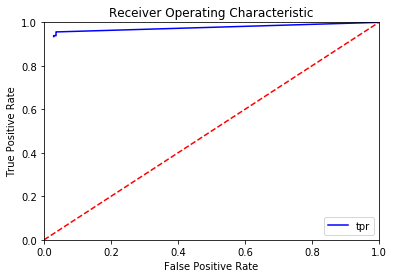

In [63]:
dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=45)
weights=logistic_regression(X_train, y_train,20000,10e-5)
print('the weights w is \n',weights) 
p=sigmoid(np.dot(X_test,weights))
roc=roc_table(p,y_test)
print('ROC table is \n',roc)
roc_curve(roc)